In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/DELL/Downloads/Coursework_dataset.csv") 
df

,Index,Variable 1,Variable 2,Label
0,1,0.41300821,-0.025361301,Blue
1,2,0.317555945,0.007643189,Blue
2,3,0.512555994,0.185423096,Red
3,4,2.183464297,-0.64862405,Red
4,5,-0.998242571,-0.502556892,Red
...,...,...,...,...
4995,4996,0.401152601,0.57133913,Red
4996,4997,0.847842363,0.916939202,Red
4997,4998,2.317778517,-0.051863315,Blue
4998,4999,2.411654404,-0.04002178,Blue


## 1. Data Cleaning:The first step of any data science or machine learning project is to make sure that the data that you will feed to your model is appropriate (“Garbage in, garbage out”). Clean your data by taking care of missing values, useless columns and outliers, as well as checking that numerical features do not contain any other type of data (eg, strings). Do not forget to set your labels as factors if required.[5 marks] 

In [3]:
df.dropna(inplace=True)

In [4]:
df.Label.unique()

array(['Blue', 'Red'], dtype=object)

In [6]:
df['Variable 1'] = pd.to_numeric(df['Variable 1'], errors='coerce').astype(float)
df['Variable 2'] = pd.to_numeric(df['Variable 2'], errors='coerce').astype(float)

In [8]:
df.dtypes

Index           int64
Variable 1    float64
Variable 2    float64
Label          object
dtype: object

In [9]:
df = df.drop(['Index'], axis = 1)

In [10]:
df

,Variable 1,Variable 2,Label
0,0.413008,-0.025361,Blue
1,0.317556,0.007643,Blue
2,0.512556,0.185423,Red
3,2.183464,-0.648624,Red
4,-0.998243,-0.502557,Red
...,...,...,...
4995,0.401153,0.571339,Red
4996,0.847842,0.916939,Red
4997,2.317779,-0.051863,Blue
4998,2.411654,-0.040022,Blue


<Axes: >

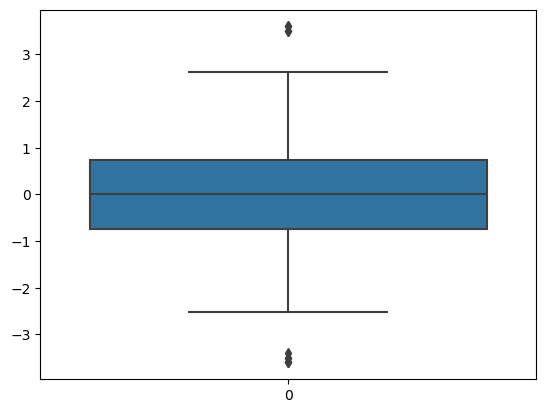

In [11]:
import seaborn as sns
sns.boxplot(df['Variable 1'])

In [12]:
#Outliers in variable 1 which are greater than 3
df_outlier_above3 = df[df['Variable 1']>3]
df_outlier_above3

,Variable 1,Variable 2,Label
456,3.5,-2.0,Red
1143,3.6,-2.0,Red
2686,3.5,2.0,Blue
3817,3.6,2.0,Blue


In [13]:
# removal of outliers which are greater than value 3 in variable 1
df_row_delete_above_3 = [456,1143,2686,3817]
df = df.drop(df_row_delete_above_3)

In [14]:
df

,Variable 1,Variable 2,Label
0,0.413008,-0.025361,Blue
1,0.317556,0.007643,Blue
2,0.512556,0.185423,Red
3,2.183464,-0.648624,Red
4,-0.998243,-0.502557,Red
...,...,...,...
4995,0.401153,0.571339,Red
4996,0.847842,0.916939,Red
4997,2.317779,-0.051863,Blue
4998,2.411654,-0.040022,Blue


In [15]:
#Outliers in variable 1 which are lesser than -3
df_outlier_below = df[df['Variable 1']< -3]
df_outlier_below

,Variable 1,Variable 2,Label
255,-3.5,2.0,Blue
1531,-3.6,2.0,Blue
2011,-3.5,-2.0,Red
3221,-3.6,-2.0,Red
4633,-3.6,-2.1,Red
4711,-3.4,2.1,Blue


In [16]:
# Removal of outliers which are lesser than value -3 in variable 1
df_row_delete_outlier = [255,1531,2011,3221,4633,4711]
df = df.drop(df_row_delete_outlier)

In [18]:
df

,Variable 1,Variable 2,Label
0,0.413008,-0.025361,Blue
1,0.317556,0.007643,Blue
2,0.512556,0.185423,Red
3,2.183464,-0.648624,Red
4,-0.998243,-0.502557,Red
...,...,...,...
4995,0.401153,0.571339,Red
4996,0.847842,0.916939,Red
4997,2.317779,-0.051863,Blue
4998,2.411654,-0.040022,Blue


<Axes: >

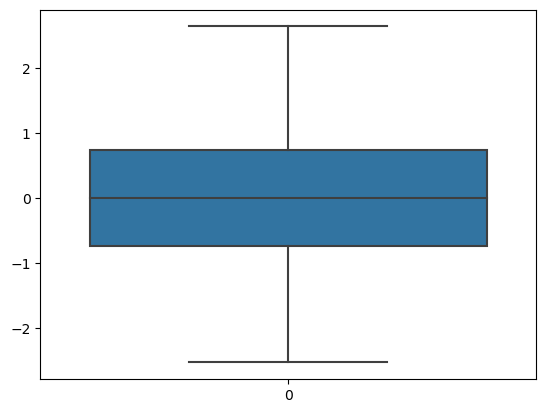

In [19]:
import seaborn as sns
sns.boxplot(df['Variable 1'])   # Rechecking for outliers in variable 1 using boxplot method

<Axes: >

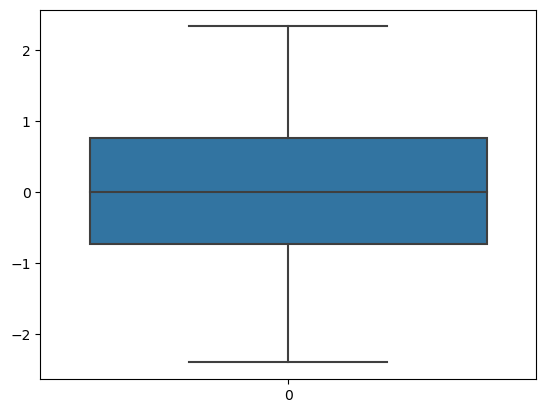

In [20]:
import seaborn as sns
sns.boxplot(df['Variable 2'])   # Rechecking for outliers in variable 2 using boxplot method

In [21]:
df['Label'] = df['Label'].astype('category') #Change the Label column to category type.

In [22]:
nan_to_zero = ['Variable 1', 'Variable 2']
df[nan_to_zero] = df[nan_to_zero].fillna(0) 

* Change the nan values that occurs in column to zero.
* We can remove them as well but later on, it will affect the accuracy by more than 1%. (Maximum Accuracy achieve = 89.3)
* Take the mean of the whole column and replace with nan but it also going to affect the accuracy on lateral stages.

## 2. Data Exploration and Visualisation.Now that your data is cleaned up, a good idea is to visualise it in order to find possible patterns that you will want your model to learn. This step will also help you in spotting any outliers. Show a plot of the data, where each class is represented by a different colour.

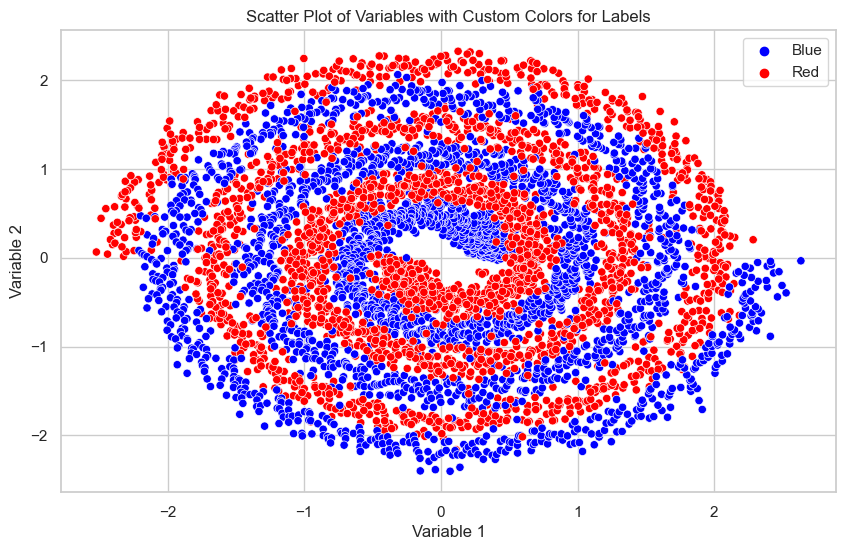

In [32]:
import matplotlib.pyplot as plt

# Set the color palette
label_colors = {'Blue': 'blue', 'Red': 'red', 'Yellow': 'yellow'}  # Add more colors as needed

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Variable 1', y='Variable 2', hue='Label', data=df, palette=label_colors)

# Identify NaN values using pd.isna() for 'Label' column
nan_mask = pd.isna(df['Label'])

# NaN values with yellow color if they are present
sns.scatterplot(x=df.loc[nan_mask, 'Variable 1'], y=df.loc[nan_mask, 'Variable 2'], color='yellow', marker='o', label='NaN')

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatter Plot of Variables with Custom Colors for Labels')


plt.legend()

plt.show()


## Model Selection: With a better understanding of the data, you are able to think about which algorithm might lead you to a good model. The following points are to be implemented.        [60 marks]

### (a) Split your data into a training set and a test set of appropriate sizes. Remember that the test set cannot be used for training, it is only used at the very end to evaluate how well your model generalises to new data.

In [33]:
from sklearn.model_selection import train_test_split

X = df[['Variable 1', 'Variable 2']]
y = df['Label']
# Split the data into 80% -20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 3988
Test set size: 997


### (b) Run a SVM algorithm on the training set with a linear kernel and default values for the hyperparameters (C (or λ) = 1). Apply this model to make predictions on the training data itself and show the plot of the data and the decision boundary given by this model. Relate the training error (or accuracy) for this model to how the decision boundary looks. Which type of regime do we have here (high-variance? high-bias?) and how could you decrease it? 

Training Accuracy: 0.5075225677031093


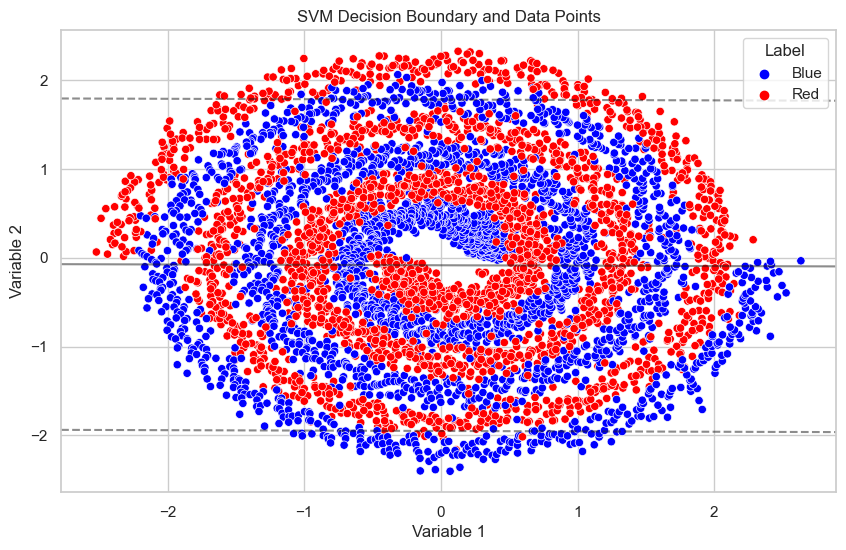

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

y_pred_train = svm_model.predict(X_train)

#Training accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy)

label_colors = {'Blue': 'blue', 'Red': 'red'}

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Variable 1', y='Variable 2', hue='Label', data=df, palette=label_colors)

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('SVM Decision Boundary and Data Points')

plt.show()


The training accuracy with this approach is .507 or 50.7 % showing that at least half of the time, prediction is correct. A training accuracy of 50.7% showing that the model's predictive power on the training data is limited. The model could be underfitting the training data, meaning it is too simplistic to capture the complexities in the dataset. It cannot show the dominant trend within the data, resulting in training errors and deficient performance of the model. If a model cannot generalize well to new data, then it cannot be used for classification or prediction tasks. 

High bias and low variance are good indicators of underfitting. This is underfit model. And have high biasness and low variance.

 

This underfitting can be reduced by following techniques: 

* Introduce more features and complexity in the data. 
* Increase the duration of training for better results. 
* Increase data for the training set. 
* Removing noise so it will allow to focus on the key features. 

### (c) Repeat the previous step, this time with a RBF kernel and 3 different values of γ: 1, 10, and 1000 (with C (or λ) fixed to 1). Explain what is happening in terms of bias and variance as γ increases (you may wish to illustrate your explanations with relevant plots).

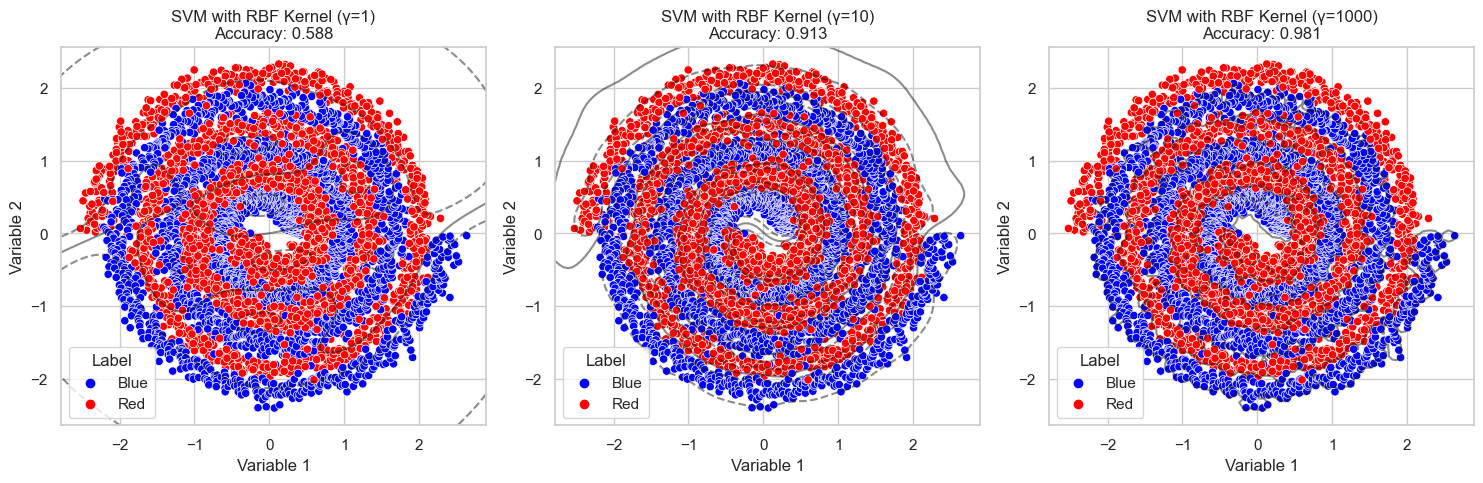

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Gamma values
gamma_values = [1, 10, 1000]

label_colors = {'Blue': 'blue', 'Red': 'red'}

#plots for each gamma value
plt.figure(figsize=(15, 5))
for i, gamma in enumerate(gamma_values, 1):
    svm_model_rbf = SVC(kernel='rbf', C=1, gamma=gamma)
    svm_model_rbf.fit(X_train_scaled, y_train)
    y_pred_train_rbf = svm_model_rbf.predict(X_train_scaled)

    # Training accuracy
    accuracy_rbf = accuracy_score(y_train, y_pred_train_rbf)

    #Decision boundary
    plt.subplot(1, 3, i)
    sns.scatterplot(x='Variable 1', y='Variable 2', hue='Label', data=df, palette=label_colors)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = svm_model_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    plt.xlabel('Variable 1')
    plt.ylabel('Variable 2')
    plt.title(f'SVM with RBF Kernel (γ={gamma})\nAccuracy: {accuracy_rbf:.3f}')

plt.tight_layout()
plt.show()


In this specific model, for first case when $\gamma$ is 1, the model might be underfit indication high bias and low variance but once the value of $\gamma$ increase to 10, the accuracy reaches to 91.3%, indicate a good accuracy but there may be the possibility of overfit (low bias but high variance) and same goes for $\gamma$ = 1000, it achieve 98.1% accuracy which looks too good to be true and there is very high possibility that model might be overfit. 

Note: The reason is described in detail in report file .

### (d) To get a better model, we need to find the hyperparameters that will minimise the validation error. With a RBF kernel, there are 2 such hyperparameters. The γ parameter as seen previously, as well as the degree of regularisation (or cost C (= 1/λ )). Perform Cross-Validation (either making your own loop, or using any function) on both parameters (either via grid-search, or narrowing down γ and then the cost) to find the value that will minimise the validation error (or maximise the accuracy). Note that the computations at this stage might take a few minutes. You may show plots such as “Validation error rate (or accuracy) vs γ” and “Validation error rate (or accuracy) vs cost”, or a grid displaying accuracy (or error) for each (γ, C) pair, to justify your choice of γ and C for your final model.

Best C: 1
Best Gamma: 10


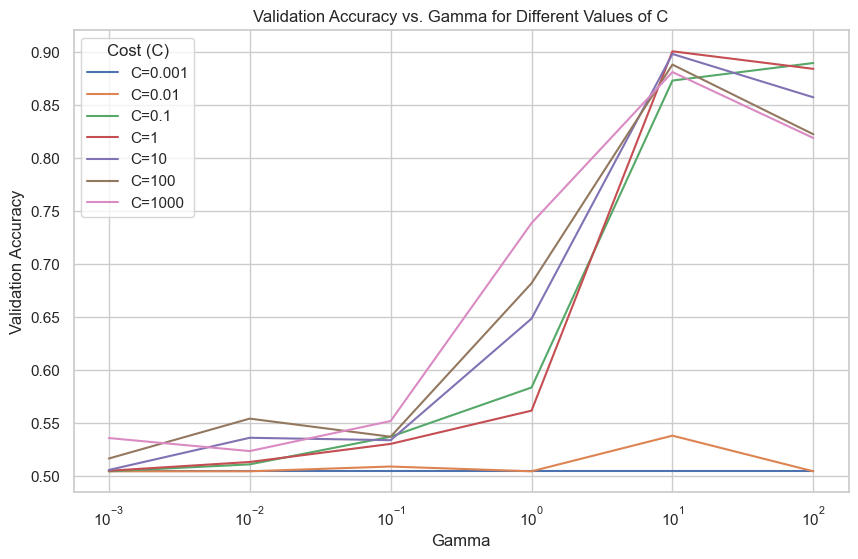

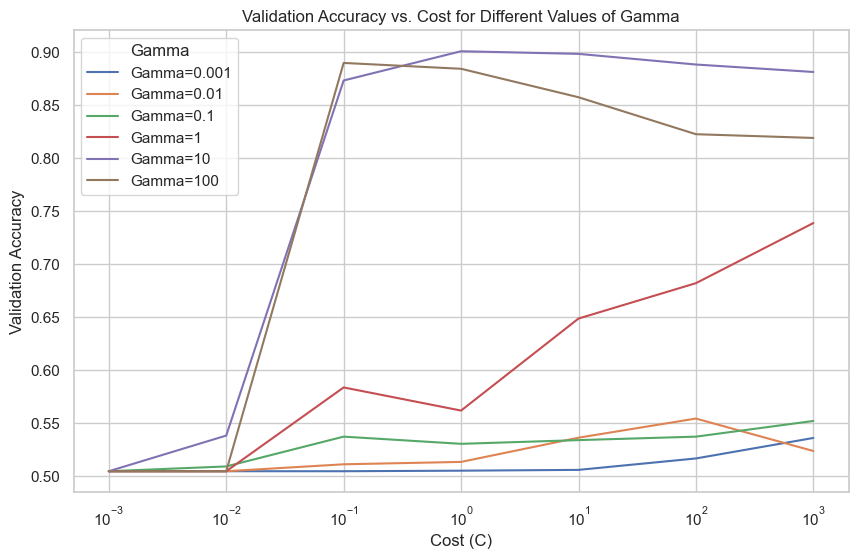

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a grid search object
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# best hyperparameter values
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

# best hyperparameters
print("Best C:", best_C)
print("Best Gamma:", best_gamma)

# Get the grid search results for plotting
results = grid_search.cv_results_
scores = np.array(results['mean_test_score']).reshape(len(param_grid['C']), len(param_grid['gamma']))

# Validation Error Accuracy vs. Gamma
plt.figure(figsize=(10, 6))
for ind, val in enumerate(param_grid['C']):
    plt.plot(param_grid['gamma'], scores[ind, :], label=f'C={val}')

plt.title('Validation Accuracy vs. Gamma for Different Values of C')
plt.xlabel('Gamma')
plt.ylabel('Validation Accuracy')
plt.legend(title='Cost (C)')
plt.xscale('log')
plt.show()

# Plotting Validation Error (Accuracy) vs. Cost
plt.figure(figsize=(10, 6))
for ind, val in enumerate(param_grid['gamma']):
    plt.plot(param_grid['C'], scores[:, ind], label=f'Gamma={val}')

plt.title('Validation Accuracy vs. Cost for Different Values of Gamma')
plt.xlabel('Cost (C)')
plt.ylabel('Validation Accuracy')
plt.xscale('log')
plt.legend(title='Gamma')
plt.show()


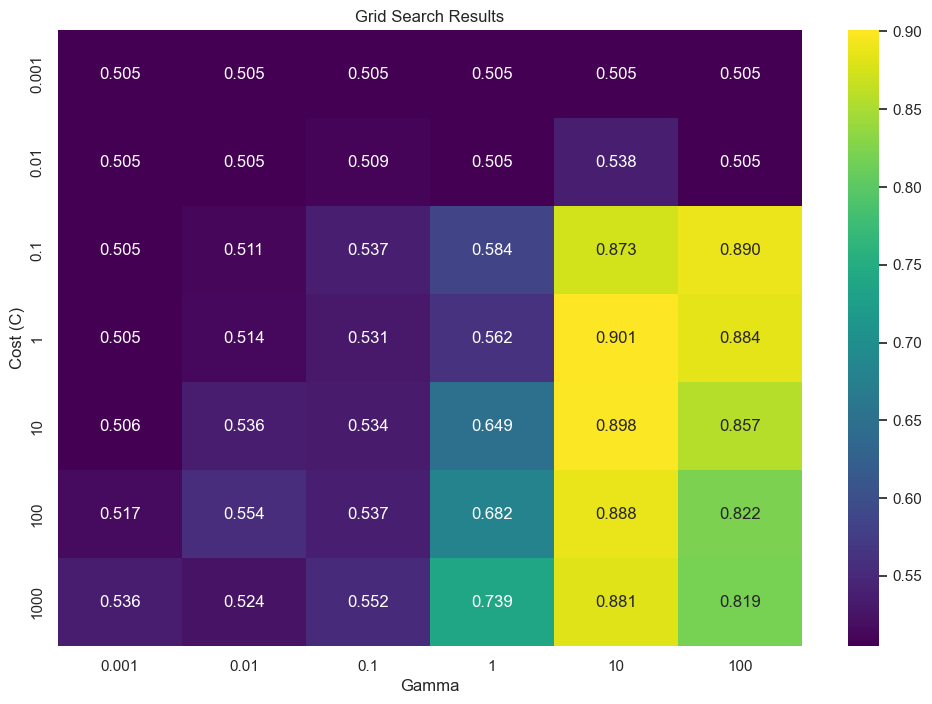

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

results = grid_search.cv_results_
scores = np.array(results['mean_test_score']).reshape(len(param_grid['C']), len(param_grid['gamma']))

#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(scores, annot=True, fmt=".3f", cmap="viridis", xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.title('Grid Search Results')
plt.xlabel('Gamma')
plt.ylabel('Cost (C)')
plt.show()

## 4. Testing and Interpretations. Now that the model has been trained and fine-tuned, it is time to test it (only once! Don’t use the test set to tune your model as you might overfit on the test set itself and make your model less generalisable). Apply your final model to the test data and report your results (plots, error rates, etc). Did you manage to get the test error below the threshold defined by your boss? If not, how would you explain it? Could anything be done to decrease the test error further? [10 marks]


In [46]:
# Finding the best case case for testing purpose
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

final_model_rbf_tuned = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
final_model_rbf_tuned.fit(X_train_scaled, y_train)

SVC(C=1, gamma=10)

Test Accuracy: 0.9017051153460381

Classification Report:
               precision    recall  f1-score   support

        Blue       0.91      0.91      0.91       518
         Red       0.90      0.90      0.90       479

    accuracy                           0.90       997
   macro avg       0.90      0.90      0.90       997
weighted avg       0.90      0.90      0.90       997


Confusion Matrix:
 [[469  49]
 [ 49 430]]


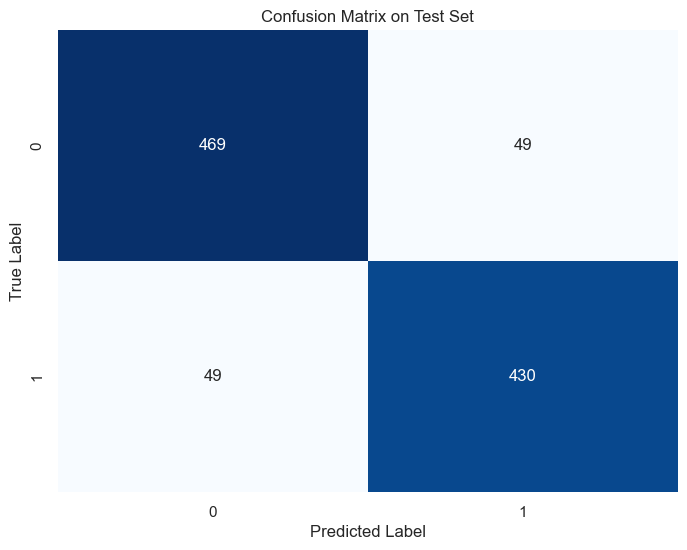

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set
y_pred_test = final_model_rbf_tuned.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Display results
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()
